In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Logistic Regression from scratch

In this notebook, I will implement Logistic Regression from scratch. Logistic Regression is a Generalized Linear model. Now, what do we mean by a Generalized Linear model?


## Generalized Linear Model

In Linear regression models the model prediction `y(x, w)` is given by a linear function of the parameters `w`. In the simplest case, the model is also linear in terms of the input variables and therefore takes the form:
                                    
$$y(x)=w^Tx + w_0$$

However, the output of the above equation is unbounded. We need to realize a function form of the posterior probability i.e. $$P(Y = y_j|x = x_i) ........0 <= P(Y|x) <= 1$$

Please note that the value of the posterior probablities lie in the range of `(0,1)`. The question is; How do we achieve this ?


## Activation function: Logistic Sigmoid
To achieve this, we consider a generalization of the linear model in which which we transform the linear function of w using a nonlinear function f ( · ) so that $$y(x)= f(w^Tx + w_0)$$

f(.) is also called the activation function

The activation function that we will use for Logistic Regression is the logistic sigmoid function. It is as shown below

$$f(x)=\frac{1}{1 + e^{-x}} = \frac{e^x}{1 + e^x}$$

Derivative of the sigmoid function is given by 

$$\frac{df(x)}{dx} = f(x)(1-f(x))$$

Shown below is a plot of the sigmoid function. It maps everything in the range (-100, 100) to (0, 1) which is what we want. Thus it looks like a good functional realization of our posterior probability. Try changing the range and you will notice that the output will always lie in between 0 and 1

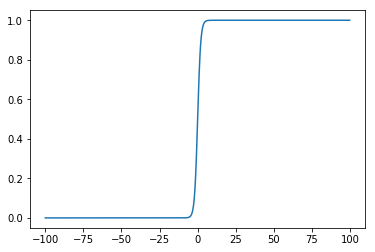

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.arange(-100, 100, 0.2)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

In [32]:
## Maximimum Likelihood

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in xrange(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print log_likelihood(features, target, weights)
        
    return weights

In [43]:
X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
Y = np.array([1, 1, -1, -1])

In [44]:
weights = logistic_regression(X, Y,
                     num_steps = 100, learning_rate = 1, add_intercept=False)
print weights

7.92740028833
[ 202.08258062    0.        ]


In [1]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [16]:
clf = linear_model.LogisticRegression(fit_intercept=True, C=10)

In [17]:
clf.fit(X, Y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
clf.coef_

array([[ 2.64696108,  0.        ]])

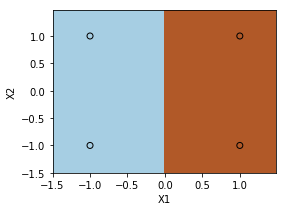

In [19]:
h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

In [12]:
print clf.get_params

<bound method LogisticRegression.get_params of LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>
